In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
import pickle

In [3]:
with open('boards.pkl','rb') as f: boards = pickle.load(f)

In [6]:
import matplotlib.pyplot as plt

In [7]:
#for MOVE in range(boards.shape[0]):
    #plt.figure()
    #plt.imshow(boards[MOVE])

In [8]:
from copy import deepcopy

In [9]:
moves = []
pred = []
for MOVE in range(boards.shape[0] - 1):
    moves.append(boards[MOVE].reshape(6*7))
    pred.append(deepcopy(boards[MOVE+1].reshape(6*7)))

In [10]:
#Normalize pred
for MOVE in range(boards.shape[0] - 1):
    pred[MOVE] -= deepcopy(moves[MOVE])
    if pred[MOVE].sum() > 1:
        pred[MOVE] /= 2

In [11]:
moves = np.array(moves)
pred = np.array(pred)

In [12]:
#Remove transitions between games
index = np.abs(pred.sum(1)) == 1
moves = moves[index]
pred = pred[index]

In [16]:
model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
model.add(keras.Input(shape=(42)))
model.add(Dense( 200, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(42, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 42)                8442      
                                                                 
Total params: 17,042
Trainable params: 17,042
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(moves,pred, batch_size=128,
          epochs=200,  callbacks=[callback], validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 34ms/step - loss: 3.8081 - accuracy: 0.0296 - val_loss: 3.7477 - val_accuracy: 0.0319
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 3.6895 - accuracy: 0.0592 - val_loss: 3.6685 - val_accuracy: 0.0319
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 3.5985 - accuracy: 0.0722 - val_loss: 3.6039 - val_accuracy: 0.0106
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 3.5312 - accuracy: 0.0923 - val_loss: 3.5536 - val_accuracy: 0.0532
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 3.4451 - accuracy: 0.1041 - val_loss: 3.5017 - val_accuracy: 0.0851
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 3.3813 - accuracy: 0.1160 - val_loss: 3.4482 - val_accuracy: 0.0957
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 3.3175 - accuracy: 0.1432 - val_loss: 3.3860 - val_accuracy: 0.1170
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.5656 - accuracy: 0.5325 - val_loss: 1.9991 - val_accuracy: 0.3511
Epoch 60/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5732 - accuracy: 0.5266 - val_loss: 1.9930 - val_accuracy: 0.3617
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5593 - accuracy: 0.5314 - val_loss: 1.9821 - val_accuracy: 0.3511
Epoch 62/200
7/7 [==============================] - 0s 8ms/step - loss: 1.5280 - accuracy: 0.5444 - val_loss: 1.9675 - val_accuracy: 0.3511
Epoch 63/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5213 - accuracy: 0.5432 - val_loss: 1.9595 - val_accuracy: 0.3511
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5161 - accuracy: 0.5444 - val_loss: 1.9555 - val_accuracy: 0.3511
Epoch 65/200
7/7 [==============================] - 0s 6ms/step - loss: 1.4772 - accuracy: 0.5467 - val_loss: 1.9541 - val_accuracy: 0.3298
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 8ms/step - loss: 1.1282 - accuracy: 0.6627 - val_loss: 1.9157 - val_accuracy: 0.3723
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1158 - accuracy: 0.6497 - val_loss: 1.9072 - val_accuracy: 0.3723
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1322 - accuracy: 0.6497 - val_loss: 1.9108 - val_accuracy: 0.3830
Epoch 120/200
7/7 [==============================] - 0s 4ms/step - loss: 1.1134 - accuracy: 0.6580 - val_loss: 1.9248 - val_accuracy: 0.3723
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1053 - accuracy: 0.6757 - val_loss: 1.9183 - val_accuracy: 0.3723
Epoch 122/200
7/7 [==============================] - 0s 8ms/step - loss: 1.0965 - accuracy: 0.6651 - val_loss: 1.8983 - val_accuracy: 0.4043
Epoch 123/200
7/7 [==============================] - 0s 6ms/step - loss: 1.0939 - accuracy: 0.6710 - val_loss: 1.8935 - val_accuracy: 0.4043
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.8940 - accuracy: 0.7266 - val_loss: 2.0590 - val_accuracy: 0.3936
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.8813 - accuracy: 0.7243 - val_loss: 2.0694 - val_accuracy: 0.3936
Epoch 177/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8795 - accuracy: 0.7361 - val_loss: 2.0632 - val_accuracy: 0.3723
Epoch 178/200
7/7 [==============================] - 0s 8ms/step - loss: 0.9097 - accuracy: 0.7361 - val_loss: 2.0672 - val_accuracy: 0.3830
Epoch 179/200
7/7 [==============================] - 0s 6ms/step - loss: 0.8573 - accuracy: 0.7562 - val_loss: 2.0861 - val_accuracy: 0.3617
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8841 - accuracy: 0.7527 - val_loss: 2.0907 - val_accuracy: 0.3511
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9042 - accuracy: 0.7243 - val_loss: 2.0532 - val_accuracy: 0.3830
Epoch 182/200
7/7 [========

In [196]:
#Board to give model to predict next move
new_board = [[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.]]

In [197]:
#Reshaped input board for model
shaped_board = np.array(new_board).reshape(1, 42)

1/1 [==============================] - 0s 0s/step


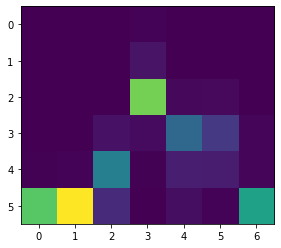

In [198]:
#Predict the next move and output heat map
predicted = model.predict(shaped_board)
plt.imshow(predicted.reshape(6,7))

In [190]:
out = deepcopy(predicted)

In [191]:
#Decide on highest probability move
value = out.argmax(axis=1)
while shaped_board[0][value] == 1:
    out[0][value] = 0
    value = out.argmax(axis=1)
value[0]

37

In [192]:
#Output next move 
space = 0
while space < 42:
    if space == value:
        out[0][space] = 1
    else:
        out[0][space] = 0
    space = space + 1
out.reshape(6,7)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)